In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
from bs4 import BeautifulSoup
import requests

In [5]:
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
'''

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [38]:
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
url = "https://www.musinsa.com/goods/reviews/lists?type=style&searchYear=2023&maxRt=2023&minRt=2009&searchKeyword=&hashId=&page=1"
html = requests.get(url,headers=header).text
soup = BeautifulSoup(html, 'lxml')


for i in range(0, 10):
#페이지네이션 적용
  res = requests.get("https://www.musinsa.com/goods/reviews/lists?type=style&searchYear=2023&maxRt=2023&minRt=2009&searchKeyword=&hashId=&page={}".format(i), header)

  goods = soup.select('.review-goods-information__name')
  goods = [good.text for good in goods]
  brands = soup.select('.review-goods-information__brand')
  brands=[brand.text for brand in brands]
  comments=soup.select('.review-contents__text')
  comments=[comment.text for comment in comments]

In [50]:
# 무신사 2 페이지 이상 크롤링
def crawl_multi_pages(page_num:int):
    url=f'https://www.musinsa.com/goods/reviews/lists?type=style&searchYear=2023&searchMonth=&searchDay=&maxRt=2023&minRt=2009&brand=&page={page_num}&sort=new&hashId=&s_type=all&searchKeyword='
    header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    html = requests.get(url,headers=header).text
    soup = BeautifulSoup(html, 'lxml')

    goods = soup.select('.review-goods-information__name')
    goods = [good.text for good in goods]
    brands = soup.select('.review-goods-information__brand')
    brands=[brand.text for brand in brands]
    comments=soup.select('.review-contents__text')
    comments=[comment.text for comment in comments]

    return goods, brands, comments

goodsTotal, brandsTotal, commentsTotal = [], [], []
for page_num in range(1,11):
    goods, brands, comments = crawl_multi_pages(page_num)

    goodsTotal.append(goods)
    brandsTotal.append(brands)
    commentsTotal.append(comments)

print(goodsTotal)
print(brandsTotal)
print(commentsTotal)

[['HOOF CURL LINE REAL WIDE DENIM PANTS BROWN', 'NGC 다이드 다운 파카_베이지(NG2CWUB900A)', '리진스 벨루어 오버핏 후드티셔츠 스카이 블루', '헤비웨이트 속기모 테이퍼드 히든 밴딩 10부 슬랙스 [블랙]', '리진스 벨루어 레귤러핏 팬츠 스카이 블루', '오버사이즈 3버튼 블레이저 [차콜 그레이]', '여성 테크 푸퍼 오버사이즈 패딩 - 팬텀 / F7277252', '울 발마칸 코트 DARK NAVY', '글로시 크롭 푸퍼 자켓-실버', '바시티 벌룬 투웨이 집업 니트 [BROWN]', '항아리퀼팅 밴딩 와이드 패딩팬츠 10 COLOR COOSPT219', '덕다운 미니멀 푸퍼 숏패딩_Mild khaki', '[패키지] 와이드핏 트레이닝 스웨트 팬츠 - 3Color', '벨란디 캐시미어 블렌드 발마칸 코트 (신더그레이)', '[패키지] NYC LOCATION SWEATSHIRT (14 COLOR) [LRSFCTM302M]', '투턱 코듀로이 벌룬 백 밴딩 팬츠 (BROWN)', '콘트라스트 스티치 스웨트 조거 팬츠 블랙', '니트 컴바인 파일럿 봄버 베이지', '워셔블 투웨이 하찌 집업 니트[네이비]', '[블프특가/사용안함]리버시블 쉐르파 집업 자켓'], ['939 DETACHABLE CROP DOWN JACKET (BLACK)', 'Mid Rise Wide Jeans DCPT027BlueCenter', 'Ray Yacht Parka Carrot', '글로리 경량 다운 자켓 BLACK', '크루넥 리브 니트 스웨터_그레이', 'XTK036 알렌 스트라이프 모헤어 니트 (BLACK/GRAY)', 'Mid Rise Wide Jeans DCPT027BlackCenter', '버니 베어 조거 팬츠', '[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK', 'Side Big Cargo Pants CAMO', 'SKADI DUCK DOWN - GLOSSY BLACK', '오버핏 볼륨 하프집업 리브드 니트

In [52]:
print(len(goodsTotal))
print(len(brandsTotal))
print(len(commentsTotal))

10
10
10


In [58]:
goods_text = [g for g in goodsTotal]

"[['HOOF CURL LINE REAL WIDE DENIM PANTS BROWN', 'NGC 다이드 다운 파카_베이지(NG2CWUB900A)', '리진스 벨루어 오버핏 후드티셔츠 스카이 블루', '헤비웨이트 속기모 테이퍼드 히든 밴딩 10부 슬랙스 [블랙]', '리진스 벨루어 레귤러핏 팬츠 스카이 블루', '오버사이즈 3버튼 블레이저 [차콜 그레이]', '여성 테크 푸퍼 오버사이즈 패딩 - 팬텀 / F7277252', '울 발마칸 코트 DARK NAVY', '글로시 크롭 푸퍼 자켓-실버', '바시티 벌룬 투웨이 집업 니트 [BROWN]', '항아리퀼팅 밴딩 와이드 패딩팬츠 10 COLOR COOSPT219', '덕다운 미니멀 푸퍼 숏패딩_Mild khaki', '[패키지] 와이드핏 트레이닝 스웨트 팬츠 - 3Color', '벨란디 캐시미어 블렌드 발마칸 코트 (신더그레이)', '[패키지] NYC LOCATION SWEATSHIRT (14 COLOR) [LRSFCTM302M]', '투턱 코듀로이 벌룬 백 밴딩 팬츠 (BROWN)', '콘트라스트 스티치 스웨트 조거 팬츠 블랙', '니트 컴바인 파일럿 봄버 베이지', '워셔블 투웨이 하찌 집업 니트[네이비]', '[블프특가/사용안함]리버시블 쉐르파 집업 자켓'], ['939 DETACHABLE CROP DOWN JACKET (BLACK)', 'Mid Rise Wide Jeans DCPT027BlueCenter', 'Ray Yacht Parka Carrot', '글로리 경량 다운 자켓 BLACK', '크루넥 리브 니트 스웨터_그레이', 'XTK036 알렌 스트라이프 모헤어 니트 (BLACK/GRAY)', 'Mid Rise Wide Jeans DCPT027BlackCenter', '버니 베어 조거 팬츠', '[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK', 'Side Big Cargo Pants CAMO', 'SKADI DUCK DOWN - GLOSSY BLACK', '오버핏 볼륨 하프집업 리브드 니

In [54]:
my_dict = {'상품명':goodsTotal, '브랜드명' :brandsTotal, '후기':commentsTotal}
pd.DataFrame(my_dict)

,상품명,브랜드명,후기
0,"[HOOF CURL LINE REAL WIDE DENIM PANTS BROWN, N...","[애드오프, 나이스고스트클럽, 리, 무신사 스탠다드, 리, 무신사 스탠다드, 가니,...","[이쁩니다 그냥 엄청 튀는 바지를 찾고 있었는데 이쁘고 잘 튀는거 같아요 ㅎㅎ, 싸..."
1,"[939 DETACHABLE CROP DOWN JACKET (BLACK), Mid ...","[아카이브 볼드, 데케트, 에스피오나지, 디아도라, 블론드나인, 엑스톤즈, 데케트,...",[입어보고 너무 가벼워서 안따뜻하면 어쩌나했는데 생각보다 따뜻해요 예쁘게 떨어지는 ...
2,"[투턱 와이드 데님팬츠 [그라파이트], 3M 신슐레이트 퀼팅자켓 카키 FPJ201,...","[미나브, 플루크, 더블유브이프로젝트, 지프, 유쓰배쓰, 예일, 토피, 어게인스트 ...",[정말 사고 싶었던 미나브 투턱 와이드 팬츠입니다ㅠㅠ이번 블프 할인으로 정말 저렴하...
3,"[XP172 빅 와이드 벌룬 데님 팬츠 (BLUE), 원턱 와이드 스웨트팬츠 그레이...","[엑스톤즈, 가까이 유니언즈, 피지컬 에듀케이션 디파트먼트, 무신사 스탠다드, 19...",[긴기장 찾고있었는데 기장도 길고 밑단도 좁아서 자연스럽게 아래가 접히는게 예뻐요 ...
4,"[Turn me On - MOD7w, [SET]오버핏 아치 로고 스웨트 셔츠, 모자...","[모드나인, 필루미네이트, 파브레가, 라미네즈, 네이더스, 비슬로우, 무신사 스탠다...","[바지 워싱감 이쁩니다. 사이즈도 와이드하게 입기 좋습니다. 모드나인 좋아요. , ..."
5,"[레이지 울 싱글 자켓 (다크 브라운), 솔리드 무톤 자켓 (블랙화이트), 우먼즈 ...","[노드 아카이브, 도프제이슨, 무신사 스탠다드, 수아레, 밀로, 비바스튜디오, 드로...",[오버핏 사이즈 블레이저에요 드랍숄더때문에 캐쥬얼한느낌도 있어서 차려입는 자리나 캐...
6,"[투톤 사선 라운드 니트 - 5color, 캐시미어 블렌드 맥시 발마칸 코트 [블랙...","[르마드, 무신사 스탠다드, 무신사 스탠다드, 트릴리온, 쿠어, 코드그라피, 무신사...",[맨살에 입어도 굉장히 편안한 부드러움에 흔하지 않은 색과 조직 짜임이 포인트가 되...
7,"[리사이클 원 턱 릴렉스드 테이퍼드 히든 밴딩 크롭 슬랙스 [블랙], 브레톤 스트라...","[무신사 스탠다드, 무신사 스탠다드, 트래블, 예일, 제로, 노이어, 프렌다, 르마...","[에잇세컨즈, 유니클로 기준 29 입습니다. 정사이즈 시켰더니 허리 많이 작습니다...."
8,"[[미나브X오정규] 코튼 솔리드 모크넥 니트 [4 COLOR], 원턱 파라슈트 카고...","[미나브, 디미트리블랙, 코드그라피, 아디다스, 더니트컴퍼니, 알에스에스씨, 무신사...",[m이냐 l이냐 고민이었는데 둘다입어보니 이너용으로 입을거면m 밖에다가도 입을거면 ...
9,"[[SET] (맨투맨 OR 후드 선택) CGP 아치 로고 트레이닝 셋업_인디핑크, ...","[코드그라피, 코드그라피, 굿라이프웍스, 스파오, 예일, 미즈노, 아웃스탠딩, 지프...",[후드티로 구매했는데 기모라 따뜻해서 잘 입고 다녀요! 키에 비해 살이 조금 많은 ...


In [59]:
url='https://www.musinsa.com/goods/reviews/lists?type=style&searchYear=2023&maxRt=2023&minRt=2009&searchKeyword=&hashId=&page=1'
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
html = requests.get(url,headers=header).text
soup = BeautifulSoup(html, 'lxml')
brands = soup.select('.review-goods-information__brand')
brands=list(map(lambda brand:brand.text,brands))
comments=soup.select('.review-contents__text')
comments=list(map(lambda comment:comment.text,comments))

In [60]:
def crawl_multi_pages(page_num:int):
    url=f'https://www.musinsa.com/goods/reviews/lists?type=style&searchYear=2023&searchMonth=&searchDay=&maxRt=2023&minRt=2009&brand=&page={page_num}&sort=new&hashId=&s_type=all&searchKeyword='
    header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
    html = requests.get(url,headers=header).text
    soup = BeautifulSoup(html, 'lxml')
    brands, comments = soup.select('.review-goods-information__brand'), soup.select('.review-contents__text')
    brands, comments = list(map(lambda brand:brand.text,brands)), list(map(lambda comment:comment.text,comments))
    return brands, comments

In [61]:
brandsTotal, commentsTotal = [], []
for page_num in range(2,50):
    brands, comments = crawl_multi_pages(page_num)
    brandsTotal+=brands
    commentsTotal+=comments
print(brandsTotal)
print(commentsTotal)

['아카이브 볼드', '데케트', '에스피오나지', '디아도라', '블론드나인', '엑스톤즈', '데케트', '아코스튜디오스페이스', '니티드', '어반드레스', '노매뉴얼', '플루크', '비슬로우', '무신사 스탠다드', '무신사 스탠다드', '씨피 컴퍼니', '키뮤어', '비얼디드키드', '알에스에스씨', '코드그라피', '미나브', '플루크', '더블유브이프로젝트', '지프', '유쓰배쓰', '예일', '토피', '어게인스트 올 오즈', '모드나인', '어반에이지', '무신사 스탠다드', '오프더도어', '고요웨어', '어게인스트 올 오즈', '브랜디드', '아노윅', '트릴리온', '무신사 스탠다드', '무신사 스탠다드', '코닥', '엑스톤즈', '가까이 유니언즈', '피지컬 에듀케이션 디파트먼트', '무신사 스탠다드', '1989스탠다드', '트래블', '몽돌', '트릴리온', '판도라핏', '스컬프터', '데케트', '쿠어', '무신사 스탠다드', '덴아워', '피그먼트', '에스피오나지', '무신사 스탠다드', '무신사 스탠다드', '쿠어', '무신사 스탠다드', '모드나인', '필루미네이트', '파브레가', '라미네즈', '네이더스', '비슬로우', '무신사 스탠다드', '덴아워', '무신사 스탠다드', '하이드아웃', '어반드레스', '세터', '예일', '모드나인', '큐티에잇', '무신사 스탠다드', '커버낫', '무신사 스탠다드', '토피', '굿라이프웍스', '노드 아카이브', '도프제이슨', '무신사 스탠다드', '수아레', '밀로', '비바스튜디오', '드로우핏', '수아레', '무신사 스탠다드', '트릴리온', '모드나인', '세터', '에잇세컨즈', '파르티멘토 우먼', '미나브', '니티드', '스컬프터', '무신사 스탠다드', '그레일즈', '탑텐', '르마드', '무신사 스탠다드', '무신사 스탠다드', '트릴리온', '쿠어', '코드그라피', '무신사 스탠다드', '펀치라인', '수아레', '무신사 스탠다드', '무신사

In [62]:
import numpy as np
from PIL import Image
brandsTotal=list(np.array(brandsTotal).flatten())
commentsTotal=list(np.array(commentsTotal).flatten())

In [72]:
word_mask=np.array(Image.open('shirts.png'))

In [74]:
from wordcloud import WordCloud
wordcloud=WordCloud(max_words=100,
                    font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
                    mask=word_mask,
                    background_color='ivory',
                    ).generate(' '.join(brandsTotal))

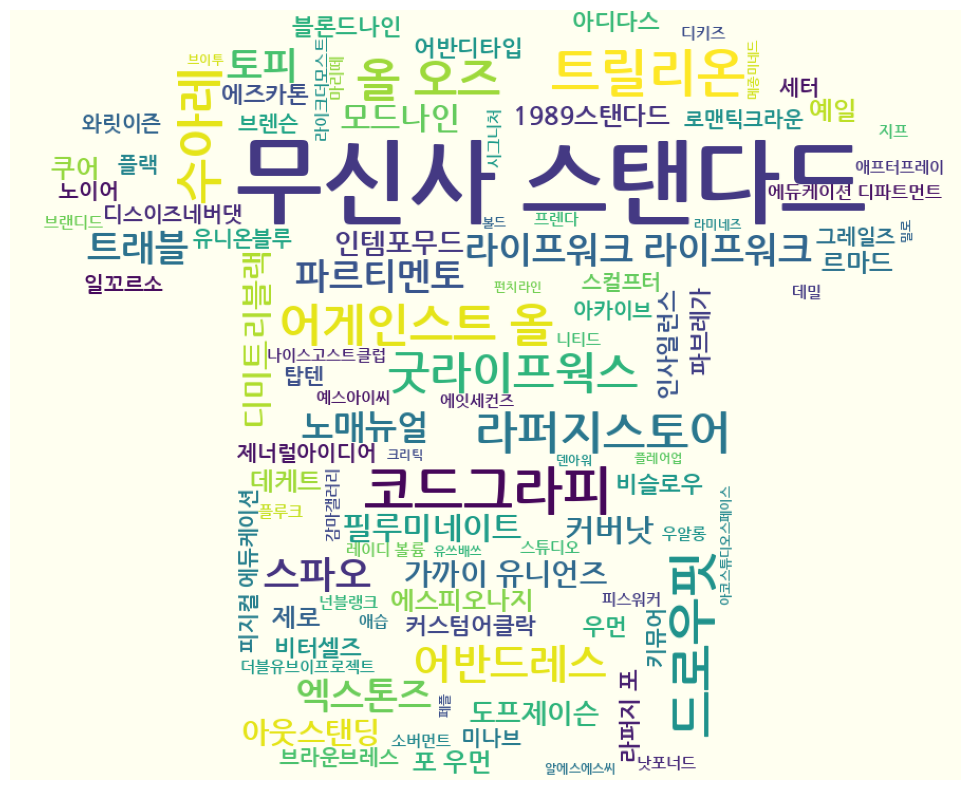

In [75]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()